## Using pre-trained mobilenetv2 model to predict a bunch of photo


In [ ]:
import tensorflow as tf
import numpy as np
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
from tensorflow.keras.applications import imagenet_utils
import os


Run #1: baby.jpeg
1/1 [==============================] - 1s 651ms/step
[[('n03877472', 'pajama', 0.1709984), ('n03188531', 'diaper', 0.16578728), ('n02786058', 'Band_Aid', 0.10130687), ('n03825788', 'nipple', 0.062163766), ('n03720891', 'maraca', 0.034751102)]]


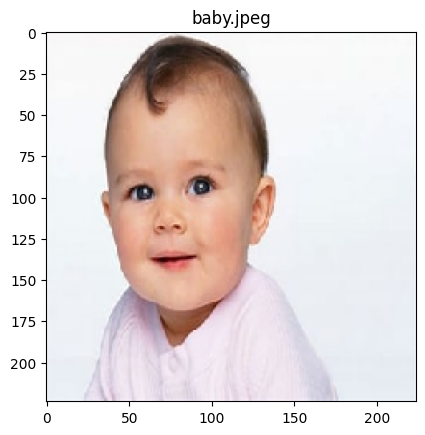

Run #2: cat.jpeg
1/1 [==============================] - 1s 668ms/step
[[('n02123045', 'tabby', 0.7222489), ('n02124075', 'Egyptian_cat', 0.09571711), ('n02123159', 'tiger_cat', 0.019644663), ('n04286575', 'spotlight', 0.0019685132), ('n03063689', 'coffeepot', 0.0018087537)]]


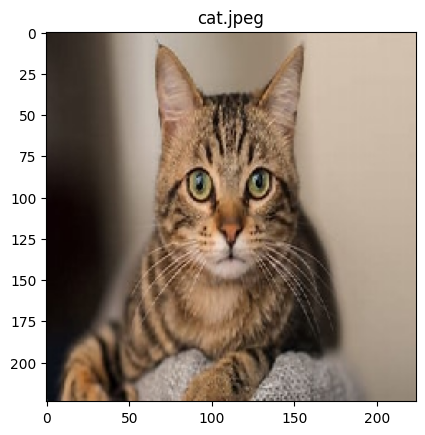

Run #3: doctor.jpeg
1/1 [==============================] - 1s 654ms/step
[[('n04591157', 'Windsor_tie', 0.6992285), ('n03630383', 'lab_coat', 0.17371511), ('n04350905', 'suit', 0.028260412), ('n04317175', 'stethoscope', 0.023356937), ('n03680355', 'Loafer', 0.011170342)]]


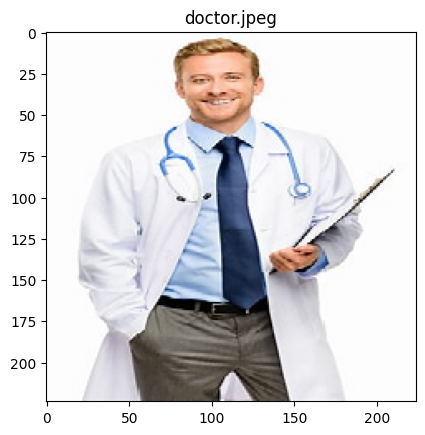

Run #4: einstein.jpeg
1/1 [==============================] - 1s 738ms/step
[[('n04350905', 'suit', 0.6387231), ('n04591157', 'Windsor_tie', 0.1443954), ('n02883205', 'bow_tie', 0.05062176), ('n02865351', 'bolo_tie', 0.025075259), ('n02669723', 'academic_gown', 0.0042075533)]]


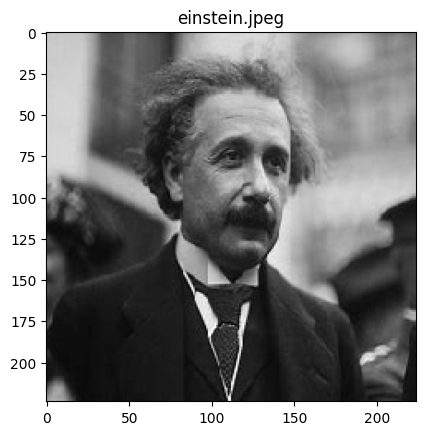

Run #5: flowers.jpeg
1/1 [==============================] - 1s 730ms/step
[[('n11939491', 'daisy', 0.23339964), ('n04522168', 'vase', 0.07154385), ('n02206856', 'bee', 0.05320316), ('n03991062', 'pot', 0.050268564), ('n03482405', 'hamper', 0.038814764)]]


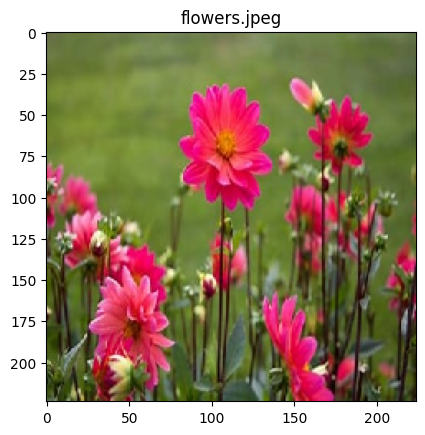

Run #6: hippo.jpeg
1/1 [==============================] - 1s 704ms/step
[[('n02398521', 'hippopotamus', 0.88615817), ('n02504013', 'Indian_elephant', 0.02780376), ('n02395406', 'hog', 0.0047498397), ('n02093428', 'American_Staffordshire_terrier', 0.0037956361), ('n02396427', 'wild_boar', 0.0035842084)]]


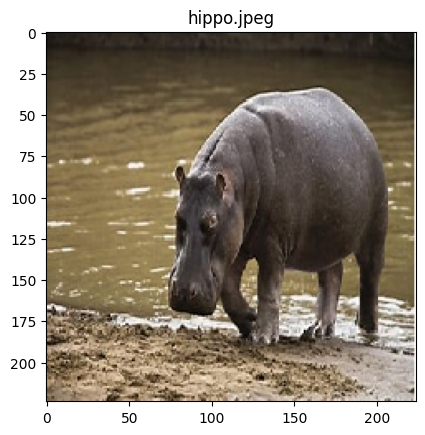

Run #7: people.jpeg
1/1 [==============================] - 1s 701ms/step
[[('n03125729', 'cradle', 0.4478266), ('n02804414', 'bassinet', 0.08460087), ('n04081281', 'restaurant', 0.029641211), ('n10148035', 'groom', 0.024683982), ('n03630383', 'lab_coat', 0.024465978)]]


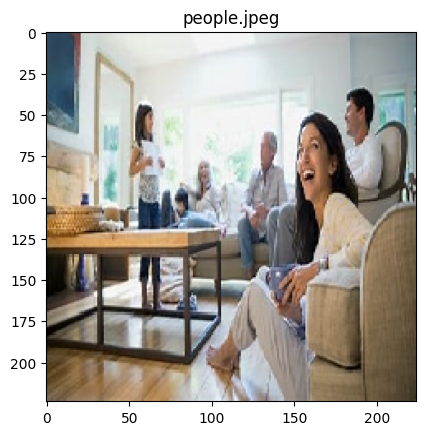

Run #8: person.jpeg
1/1 [==============================] - 1s 697ms/step
[[('n02808440', 'bathtub', 0.64337295), ('n04493381', 'tub', 0.08034132), ('n04209239', 'shower_curtain', 0.018071504), ('n02808304', 'bath_towel', 0.013522984), ('n02860847', 'bobsled', 0.013503056)]]


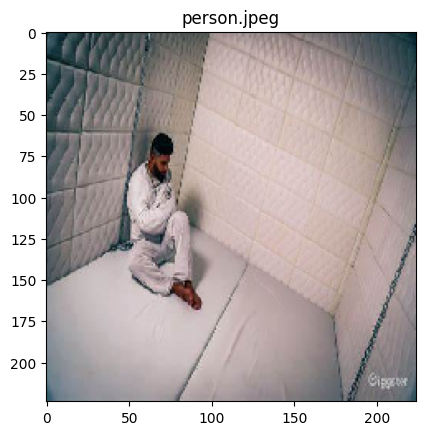

Run #9: tiger.jpeg
1/1 [==============================] - 1s 724ms/step
[[('n02129604', 'tiger', 0.87498146), ('n02123159', 'tiger_cat', 0.072880395), ('n02128925', 'jaguar', 0.0064465855), ('n02391049', 'zebra', 0.0020500622), ('n02127052', 'lynx', 0.0012476579)]]


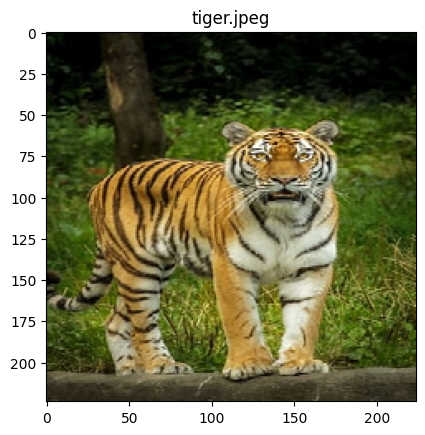

Run #10: truck.jpeg
1/1 [==============================] - 1s 719ms/step
[[('n04467665', 'trailer_truck', 0.96587265), ('n04461696', 'tow_truck', 0.0034419121), ('n03496892', 'harvester', 0.0029253238), ('n04428191', 'thresher', 0.002476623), ('n04252225', 'snowplow', 0.0024435553)]]


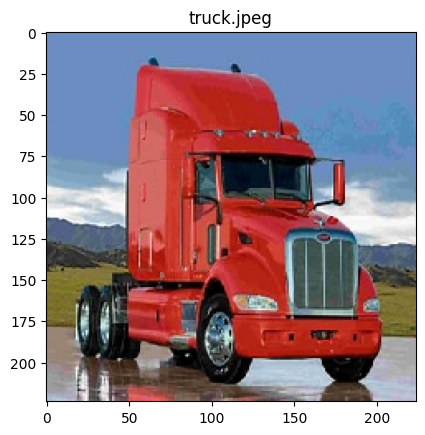

In [11]:

SAMPLE_IMGS = "../contents/sample_imgs"
filelist = os.listdir(SAMPLE_IMGS)
plt.figsize=(1,1)

for file in filelist:
    i = filelist.index(file)
    print(f"Run #{i+1}: {file}")
    #displaying images
    img = image.load_img(os.path.join(SAMPLE_IMGS,file),target_size=(224,224))
    plt.figure(i+1)
    plt.imshow(img)
    plt.title(file)

    #initializing the model to predict the image details using predefined models.
    model = tf.keras.applications.mobilenet_v2.MobileNetV2()
    resizedimg = image.img_to_array(img)
    finalimg = np.expand_dims(resizedimg,axis=0)
    finalimg = tf.keras.applications.mobilenet_v2.preprocess_input(finalimg)
    finalimg.shape
    predictions = model.predict(finalimg)

    # To predict and decode the image details
    results = imagenet_utils.decode_predictions(predictions)
    print(results)
    plt.show()

Convert model to tflite

In [ ]:
convertor = tf.lite.TFLiteConverter.from_keras_model(model)
# convertor.optimizations = [tf.lite.Optimize.DEFAULT]
tflite_quant_model = convertor.convert()
open('../contents/tflite_quant.tflite', 'wb').write(tflite_quant_model)